## Advanced Visualization

- This following snippet of code (imported as an image) shows how to use the example data (in **netCDF** format)
- For simplicity, you are provided with the observed and simulated flows in a .csv file ("data_obs_sims.csv")
- You can download the original data (in netCDF format) from here: https://github.com/ThibHlln/hydroeval/tree/main/sample_data
- Take the below image as a guide and experiment on your own to run the code using netCDF data

#### This is an image showing the manipulation of netCDF data
<img src="netCDF.PNG">

#### Let's stard coding!

In [1]:
# Let us load the data
import pandas as pd
data = pd.read_csv('data_obs_sims.csv')
data.head()

,Obs,Sim1,Sim2,Sim3,Sim4,Sim5,Sim6,Sim7,Sim8,Sim9,...,Sim11,Sim12,Sim13,Sim14,Sim15,Sim16,Sim17,Sim18,Sim19,Sim20
0,4.901051,1.063771,2.007536,1.214454,2.692770,1.396070,1.844142,1.640803,0.954048,1.504389,...,0.794013,0.550339,1.748920,0.597982,1.195836,1.093881,1.551083,1.556347,1.137513,1.582958
1,4.288905,1.121907,2.105129,1.259399,2.804215,1.415336,1.951381,1.708590,0.988717,1.587766,...,0.809153,0.604028,1.796808,0.613097,1.302006,1.107714,1.554160,1.588246,1.173596,1.616097
2,4.481438,1.307203,2.287111,1.771217,2.937074,1.449701,2.099528,1.797116,1.047202,1.678548,...,0.831471,0.718370,1.863424,0.728677,1.438121,1.133653,1.560539,1.627271,1.227450,1.683875
3,7.945478,1.649455,2.670139,3.179700,3.179014,1.520323,2.426937,1.969467,1.189887,1.787724,...,0.874508,1.023334,2.004739,1.467674,1.706858,1.202565,1.576077,1.688534,1.343960,1.838314
4,4.667372,1.667106,2.772402,3.000780,3.451881,1.577254,2.687345,2.159792,1.327840,1.919744,...,0.934859,1.106226,2.145530,2.244114,2.001918,1.277795,1.596429,1.761711,1.463256,1.908583


In [2]:
data.shape

(4383, 21)

In [3]:
# Let us drop any NaNs in the data
data.dropna(inplace=True)

In [4]:
# As an exercise, let us save the observation and simulations in separate dataframes
# Separating them is not required - we are doing it for the sake of this exercise
obs = pd.DataFrame(data['Obs'])
sim = data.iloc[:,1:]

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
# You can use either of the following to install seaborn
# !pip install --yes seaborn
# !conda install --yes seaborn
import seaborn as sns
sns.set(color_codes=True)

In [6]:
import warnings
warnings.filterwarnings('ignore')

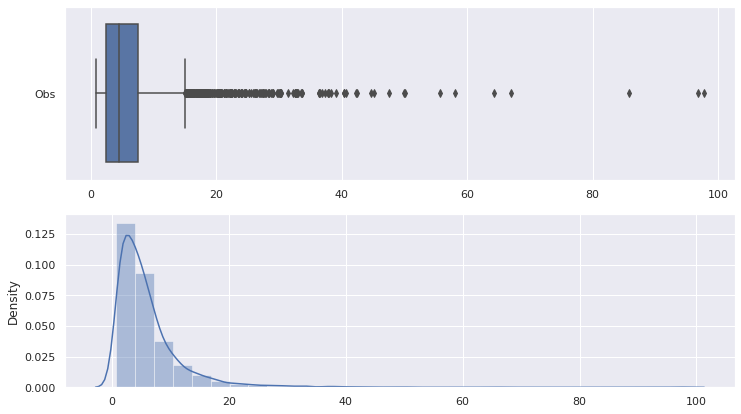

In [7]:
plt.figure(figsize=(12,7))
plt.subplot(211)
sns.boxplot(data=obs,orient='h');
plt.subplot(212)
sns.distplot(obs,kde=True,bins=30);

In [8]:
import numpy as np
# Let us create a
def histogram_boxplot(feature, figsize=(12,7), bins = None):
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid = 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.5, .5)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True) # boxplot will be created and a marker will indicate the mean value of the column
    sns.distplot(feature, kde=False, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=True, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), linestyle='-') # Add median to the histogram

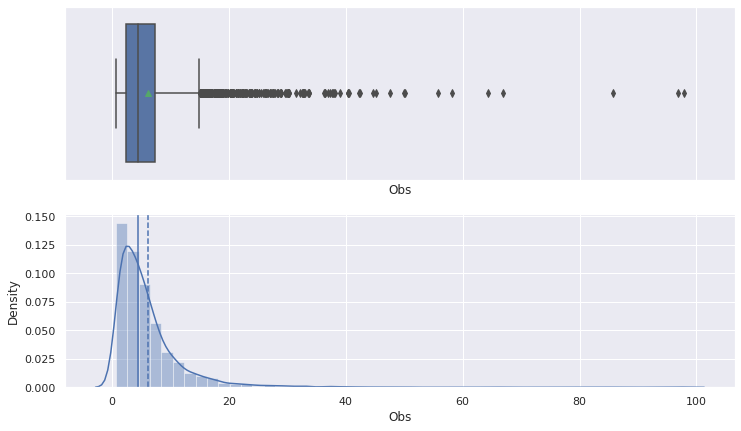

In [9]:
histogram_boxplot(obs['Obs'])

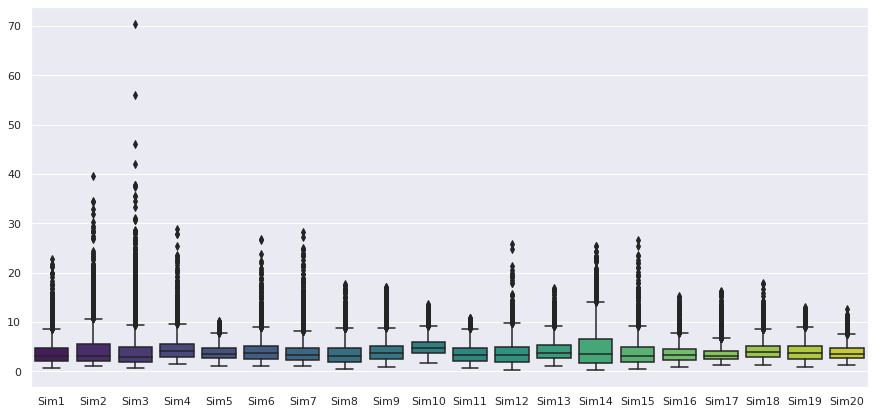

In [10]:
plt.figure(figsize=(15,7))
sns.boxplot(data=sim, palette='viridis');

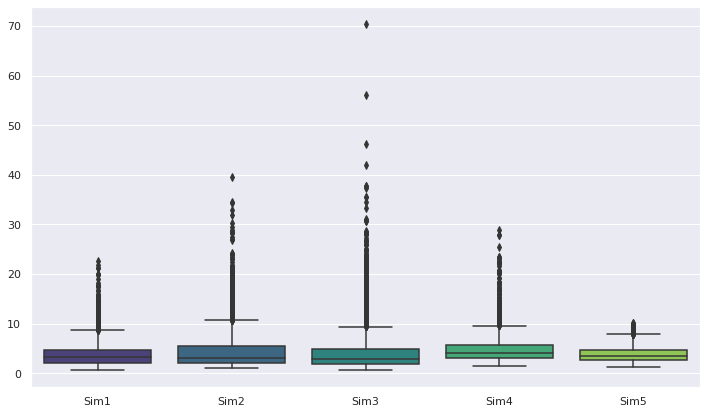

In [11]:
plt.figure(figsize=(12,7))
sns.boxplot(data=sim[['Sim1','Sim2','Sim3','Sim4','Sim5']],palette='viridis');

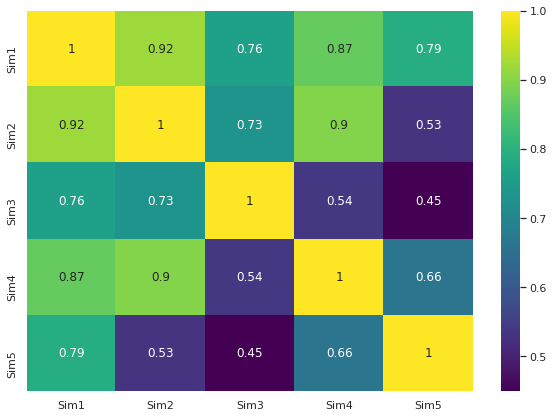

In [12]:
sim5 = sim[['Sim1','Sim2','Sim3','Sim4','Sim5']]
plt.figure(figsize=(10,7))
sns.heatmap(sim5.corr(),annot=True,cmap='viridis');

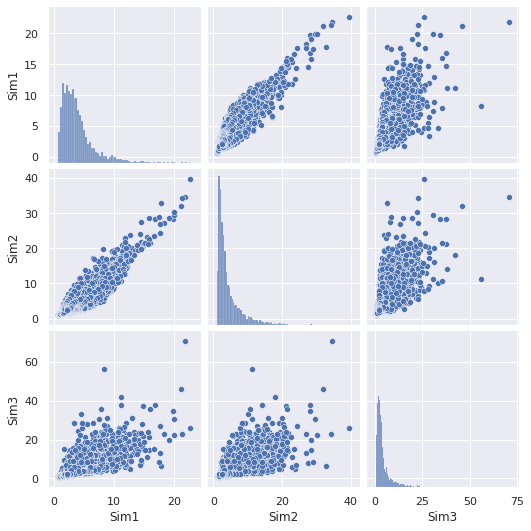

In [13]:
sim3 = sim[['Sim1','Sim2','Sim3']]
sns.pairplot(sim3);

In [14]:
from hydroeval import evaluator, nse
my_nse = evaluator(nse, sim, obs, axis=0);my_nse = my_nse.T;

In [15]:
my_nse = {'Simulation':['Sim1','Sim2','Sim3','Sim4','Sim5','Sim6','Sim7','Sim8','Sim9','Sim10',
    'Sim11','Sim12','Sim13','Sim14','Sim15','Sim16','Sim17','Sim18','Sim19','Sim20'],'NSE':my_nse}
my_nse = pd.DataFrame(data=my_nse)

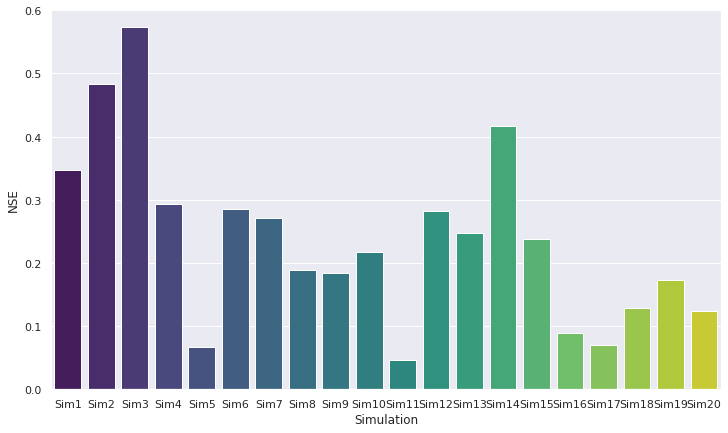

In [17]:
plt.figure(figsize=(12,7))
sns.barplot(x='Simulation',y='NSE',data=my_nse,palette='viridis');